# 랭그래프 LangGraph
![](https://langchain-ai.github.io/langgraph/static/wordmark_dark.svg)

**랭그래프LangGraph**는 랭체인을 개발한 LangChain.inc에서 개발한 **에이전트 오케스트레이션 프레임워크**. 

기존 선형적인 체인 구조를 넘어서, **복잡한 다중 에이전트 시스템**과 **상태를 가진 워크플로**를 구축할 수 있도록 설계. 

클라나Klarna, 리플릿Replit, 우버, 일레스틱 Elastic과 같은 대기업들이 프로덕션 환경에서 사용하고 있으며, 
복잡한 워크플로와 오래 걸리는 작업을 처리하는 데 최적화되어 있다.

- 공식메인: https://www.langchain.com/langgraph
- 공식Document: https://docs.langchain.com/oss/python/langchain/overview


# 1.그래프(Graph) 자료구조의 이해

랭그래프를 제대로 이해하려면 먼저 그래프 Graph 자료구조에 대한 기본 개념을 알아야 합니다. 

## 노드 & 에지

그래프(Graph)는 **노드(Node)** 와 **에지(Edge)** 로 구성된 자료구조로, 객체 간의 **관계**를 표현하는 데 매우 효과적입니다. 

※자료구조에선 노드를 버텍스(Vertex), 에지를 아크(Arc) 라고도 표기하기도 함.

![](https://dz2cdn1.dzone.com/storage/temp/13817670-figure-1.png)


![](https://www.computersciencebytes.com/wp-content/uploads/2017/01/vertices_edges.png)

## Directed vs. Undirected
그래프는 방향성에 따라 방향 그래프 Directed Graph 와 무방향 그래프 Undirected Graph 로 나뉩니다. 

![](https://www.chhitizbuchasia.com/static/9a65c24a1cc442a1c313eee8f8796494/f73a1/graph-direction.png)

**랭그래프는 방향 그래프를 기반**으로 합니다. 이는 작업의 흐름이 특정 방향을 가지기 때문입니다. 
예를 들어 A 작업이 완료된 후 B 작업이 실행되는 것을 그래프로 명확하게 표현할 수 있습니다.

## Cyclic vs. Acyclic 
![](https://i.imgur.com/2z9J2E5.png)
그래프의 또 다른 중요한 특성은 순환(cycle)의 존재 여부입니다. 
순환이 없는 그래프를 **DAG(Directed Acyclic Graph)** 라고 하며, 많은 워크플로 시스템이 DAG만을 이용합니다. 

랭그래프는 __순환이 있는 그래프도 사용할 수 있습니다__. 이를 통해 조건이 만족될 때까지 특정 작업을 반복하거나, 
이전 단계로 돌아가는 등의 복잡한 패턴을 구현할 수 있습니다.

# 2.랭그래프의 핵심 개념
랭그래프에서 가장 중요한 개념은 **상태(state), 노드(node), 에지(edge)** 다

## 상태(state)
**상태**는 그래프 실행 과정에서 지속적으로 유지되는 데이터로 각 노드가 실행될 때마다 읽고 쓸 수 있습니다. 

이는 단순한 변수 전달을 넘어 전체 워크플로의 컨텍스트를 관리하는 **중앙 저장소 역할**을 합니다. 

상태는 일반적으로 **TypedDict**나 **Pydantic 모델**로 정의되어 타입 안정성을 보장합니다.

![](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dba5f465f6e9a2482ad935_simple-graph1.png)

## 노드(node)
'노드' 는 그래프의 기본 실행 단위입니다.  각 노드는 특정 작업을 수행하는 **함수**나 **에이전트**를 나타내며, 다음과 같은 특징을 가집니다.

- 현재 상태를 **입력**으로 받음
- 특정 **작업을 수행**(LLM 호출, 데이터 처리, 외부 API 호출 등)
- **업데이트된 상태를 반환(리턴)**

노드는 순수함수일 수도 있고, 부수 효과side Effects를 가질 수도 있습니다. 예를 들어 DB에 쓰기 작업을 하거나 외부 API를 호출할 수도 있습니다.

## 에지(edge)
'에지'는 노드 간의 연결을 정의하며, 실행 흐름을 제어합니다. 랭그래프는 두 가지 유형의 에지를 지원합니다.

1. **일반 에지** : 항상 같은 경로로 진행

2. **조건부 에지**: 상태에 따라 다른 노드로 분기

조건부 에지는 동적 라우팅을 가능하게 하여, 런타임에 실행 경로를 결정할 수 있습니다. 
이를 사용하여 AI 에이전트가 상황에 따라 다른 전략을 선택하게 하거나, 오류 처리 로직을 구현하는 데 유용합니다.

* 일반에지는 실선으로 표현하고, 조건부 에지는 점선으로 표기하기도 한다
![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2FbmQ1V0%2FbtsO9pWxNrk%2FAAAAAAAAAAAAAAAAAAAAAPPkwBPstxlJ70mB38Az5m_RNtNo8VeKvpMnhv6dtkTE%2Fimg.png%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1767193199%26allow_ip%3D%26allow_referer%3D%26signature%3DfbcGKh3RNPXIQyz2odx2K6DFm9Q%253D)

# 3. Hello LangGraph

In [ ]:
# 다음과 같은 흐름으로 구성된 랭그래프 예제를 만들어봅시다.

# [시작] --> [Greeting] --> [Processing] --> [종료]

In [1]:
from typing import Dict, Any
from pydantic import BaseModel, Field
from IPython.display import Image, display

from langgraph.graph import StateGraph, START, END

## 상태 정의

In [2]:
# 워크 플로우 단계 정의
class WorkflowStep:
    GREETING = 'GREETING'
    PROCESSING = 'PROCESSING'

In [3]:
# 그래프 '상태' 정의
class GraphState(BaseModel):
    name: str = Field(default="", description="사용자 이름")
    greeting: str = Field(default="", description="생성된 이사말")
    processed_message: str = Field(default="", description="처리도니 최종 메세지")


## 노드 정의

In [4]:
# 첫번째 노드 함수
#   상태값인 state 를 입력 받아 인사말 greeting 을 생성하고 리턴함.
def generate_greeting(state: GraphState) -> Dict[str, Any]:
    name = state.name or "아무개"
    greeting = f"안녕하세요, {name}님!"
    print(f'[generate_greeting] 인사말 생성: {greeting}')
    # ↓ 리턴하는 값으로 state 의 greeting 값만 업데이트 된다! <- 랭그래프가 자동으로 동작시킴
    return {"greeting": greeting} 

In [12]:
# 두번째 노드 함수
#   상태값인 state 를 입력 받아 최종 메세지 processed_message 를 생성합니다
def process_message(state: GraphState) -> Dict[str, Any]:
    greeting = state.greeting
    processed_message = f"{greeting} LangGraph 에 오신 것을 환영합니다!"

    print(f'[process_message] 최종메세지: {process_message}')

    return {"processed_message": processed_message}


## 그래프 정의

In [13]:
def create_hello_graph():
    # 상태를 가진 워크플로(그래프) 객체 생성
    # StateGraph(상태)
    workflow = StateGraph(GraphState)

    # 노드 추가
    # .add_node(노드이름, 노드함수)
    workflow.add_node(WorkflowStep.GREETING, generate_greeting)
    workflow.add_node(WorkflowStep.PROCESSING, process_message)

    #  시작점 설정
    # add_edge(노드1, 노드2)  노드1 → 노드2 엣지 형성
    workflow.add_edge(START, WorkflowStep.GREETING)

    #  엣지 추가
    workflow.add_edge(WorkflowStep.GREETING, WorkflowStep.PROCESSING)
    workflow.add_edge(WorkflowStep.PROCESSING, END)   # 그래프 종료지점 END 설정

    # 그래프 컴파일 -> 실행가능(Runnable)한 그래프 객체 생성 (.invoke() 호출 가능!)
    app = workflow.compile()

    return app
    

## 그래프 생성 & 실행

In [14]:
app = create_hello_graph()  # 그래프 생성

# app.invoke()  # 반드시 State 가 input 으로 전달되어야 한다

In [15]:
# State(상태) 준비
initial_state = GraphState(name="감귤", greeting="xxxx", processed_message="@@@@@")
print("초기상태:", initial_state)
print("초기상태:", initial_state.model_dump())

초기상태: name='감귤' greeting='xxxx' processed_message='@@@@@'
초기상태: {'name': '감귤', 'greeting': 'xxxx', 'processed_message': '@@@@@'}


In [16]:
# 그래프 실행(invoke) 결과값은 State
final_state = app.invoke(initial_state)
print('최종상태:', final_state)

[generate_greeting] 인사말 생성: 안녕하세요, 감귤님!
[process_message] 최종메세지: <function process_message at 0x0000016DFF7BE160>
최종상태: {'name': '감귤', 'greeting': '안녕하세요, 감귤님!', 'processed_message': '안녕하세요, 감귤님! LangGraph 에 오신 것을 환영합니다!'}


## 그래프 이미지 생성

In [19]:
graph = app.get_graph()  # Graph 객체 리턴

In [21]:
result = graph.draw_mermaid_png()  # png 바이너리 리턴.
# result

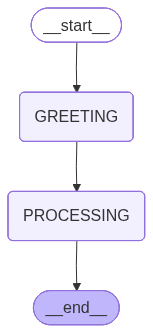

In [22]:
Image(result)

In [23]:
with open('./01_hello_langgraph.png', 'wb') as f:
    f.write(result)

In [25]:
# 그래프를 문자열로도 출력해준다 
# pip install grandalf  
print(graph.draw_ascii())

+-----------+  
| __start__ |  
+-----------+  
       *       
       *       
       *       
 +----------+  
 | GREETING |  
 +----------+  
       *       
       *       
       *       
+------------+ 
| PROCESSING | 
+------------+ 
       *       
       *       
       *       
  +---------+  
  | __end__ |  
  +---------+  
